In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("Data/Real-Data/Real_Combine.csv")
df=df.dropna()

In [4]:
#sns.heatmap(df.isnull())

In [5]:
x=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
#kernal_initalizer is also called as weight_intilizer



NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#When we are using relu we should use 'Normal'


# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
#HERE ITS LINEAR  
#classif=softmax,sigmod
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

C:\Users\91901\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 511 samples, validate on 253 samples
Epoch 1/100
511/511 [==============================] - 3s 5ms/step - loss: 68.1632 - mean_absolute_error: 68.1632 - val_loss: 65.7456 - val_mean_absolute_error: 65.7456
Epoch 2/100
511/511 [==============================] - 0s 397us/step - loss: 65.8112 - mean_absolute_error: 65.8112 - val_loss: 63.0794 - val_mean_absolute_error: 63.0794
Epoch 3/100
511/511 [==============================] - 0s 385us/step - loss: 64.4541 - mean_absolute_error: 64.4541 - val_loss: 58.0804 - val_mean_absolute_error: 58.0804
Epoch 4/100
511/511 [==============================] - 0s 425us/step - loss: 57.7268 - mean_absolute_error: 57.7267 - val_loss: 51.5366 - val_mean_absolute_error: 51.5366
Epoch 5/100
511/511 [==============================] - 0s 521us/step - loss: 53.5672 - mean_absolute_error: 53.5672 - val_loss: 47.2522 - val_mean_absolute_error: 47.2522
Epoch 6/100
511/511 [==============================] - 0s 511us/step - loss: 45.4469 - mean_absolute_

511/511 [==============================] - 0s 469us/step - loss: 41.5894 - mean_absolute_error: 41.5894 - val_loss: 43.8517 - val_mean_absolute_error: 43.8517
Epoch 49/100
511/511 [==============================] - 0s 425us/step - loss: 39.7282 - mean_absolute_error: 39.7282 - val_loss: 48.5290 - val_mean_absolute_error: 48.5290
Epoch 50/100
511/511 [==============================] - 0s 482us/step - loss: 43.5831 - mean_absolute_error: 43.5831 - val_loss: 46.7387 - val_mean_absolute_error: 46.7387
Epoch 51/100
511/511 [==============================] - 0s 497us/step - loss: 39.6125 - mean_absolute_error: 39.6125 - val_loss: 45.8446 - val_mean_absolute_error: 45.8446
Epoch 52/100
511/511 [==============================] - 0s 534us/step - loss: 39.9171 - mean_absolute_error: 39.9170 - val_loss: 48.1731 - val_mean_absolute_error: 48.1731
Epoch 53/100
511/511 [==============================] - 0s 520us/step - loss: 41.2355 - mean_absolute_error: 41.2355 - val_loss: 44.2627 - val_mean_absol

Epoch 96/100
511/511 [==============================] - 0s 494us/step - loss: 40.1053 - mean_absolute_error: 40.1053 - val_loss: 42.8788 - val_mean_absolute_error: 42.8788
Epoch 97/100
511/511 [==============================] - 0s 512us/step - loss: 38.8188 - mean_absolute_error: 38.8188 - val_loss: 46.5343 - val_mean_absolute_error: 46.5343
Epoch 98/100
511/511 [==============================] - 0s 536us/step - loss: 38.6523 - mean_absolute_error: 38.6523 - val_loss: 42.7505 - val_mean_absolute_error: 42.7505
Epoch 99/100
511/511 [==============================] - 0s 561us/step - loss: 39.9023 - mean_absolute_error: 39.9023 - val_loss: 42.5781 - val_mean_absolute_error: 42.5781
Epoch 100/100
511/511 [==============================] - 0s 484us/step - loss: 38.7768 - mean_absolute_error: 38.7768 - val_loss: 44.1875 - val_mean_absolute_error: 44.1875


In [10]:
prediction=NN_model.predict(X_test)

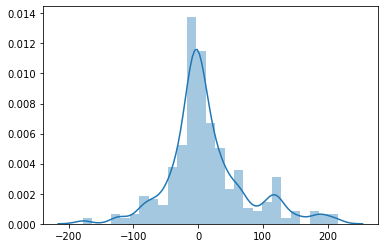

In [11]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

In [16]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 42.62632310022184
MSE: 4017.8313914857063
RMSE: 63.38636597475601


In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 42.62632310022184
MSE: 4017.8313914857063
RMSE: 63.38636597475601
